# TWITTER BOT CLASSIFICATION

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
twitter_df = pd.read_csv("../dataset/twitter_human_bots_dataset.csv")

In [3]:
twitter_df.head()

,Unnamed: 0,created_at,default_profile,default_profile_image,description,favourites_count,followers_count,friends_count,geo_enabled,id,lang,location,profile_background_image_url,profile_image_url,screen_name,statuses_count,verified,average_tweets_per_day,account_age_days,account_type
0,0,2016-10-15 21:32:11,False,False,"Blame @xaiax, Inspired by @MakingInvisible, us...",4,1589,4,False,787405734442958848,en,unknown,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/7874121826...,best_in_dumbest,11041,False,7.870,1403,bot
1,1,2016-11-09 05:01:30,False,False,Photographing the American West since 1980. I ...,536,860,880,False,796216118331310080,en,Estados Unidos,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/8023296328...,CJRubinPhoto,252,False,0.183,1379,human
2,2,2017-06-17 05:34:27,False,False,Scruffy looking nerf herder and @twitch broadc...,3307,172,594,True,875949740503859204,en,"Los Angeles, CA",http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1278890453...,SVGEGENT,1001,False,0.864,1159,human
3,3,2016-07-21 13:32:25,True,False,Wife.Godmother.Friend.Feline Fanatic! Assistan...,8433,517,633,True,756119643622735875,en,"Birmingham, AL",NaN,http://pbs.twimg.com/profile_images/1284884924...,TinkerVHELPK5,1324,False,0.889,1489,human
4,4,2012-01-15 16:32:35,False,False,Loan coach at @mancity & Aspiring DJ,88,753678,116,True,464781334,en,"England, United Kingdom",http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/9952566258...,JoleonLescott,4202,True,1.339,3138,human


In [4]:
twitter_df.shape

(37438, 20)

# Steps to follow in any ML / Data Science Project

## 1) EDA (Exploratory Data Analysis

## ---------------------------------------------------------------------------------------------------------------------------

### a) Clearly understand the task and the dataset that we have

### b) Dependency between target and the features

### c) Check for Missing values

### d) Handle categorical features

### e) Handle outliers

### f) Scale the features

### g) Check the correlation between the features and the target variable

### h) Feature Engineering

### i) Feature Selection

### j) Shuffle and Split the data


## 2) Train few ML models with default parameters and check the performance

## 3) Fit the base model using KFold Cross validation with K splits, choose the Top 2-3 models from it and then fine tune them further (HyperParameter tuning)

## 4) Experimentations:
## ----------------------------------

### a) Try out different scaling method

### b) Try out a different way to identify and handle the outliers

### c) Check if you can work more on feature engineering or feature selection process

# Missing values count expressed in terms of percentage

In [5]:
(twitter_df.isnull().sum()/twitter_df.shape[0])*100

Unnamed: 0                       0.000000
created_at                       0.000000
default_profile                  0.000000
default_profile_image            0.000000
description                     19.381377
favourites_count                 0.000000
followers_count                  0.000000
friends_count                    0.000000
geo_enabled                      0.000000
id                               0.000000
lang                            21.253806
location                         0.008013
profile_background_image_url    12.017202
profile_image_url                0.002671
screen_name                      0.000000
statuses_count                   0.000000
verified                         0.000000
average_tweets_per_day           0.000000
account_age_days                 0.000000
account_type                     0.000000
dtype: float64

In [6]:
twitter_df.drop('Unnamed: 0', axis = 1, inplace = True)

In [7]:
twitter_df.head()

,created_at,default_profile,default_profile_image,description,favourites_count,followers_count,friends_count,geo_enabled,id,lang,location,profile_background_image_url,profile_image_url,screen_name,statuses_count,verified,average_tweets_per_day,account_age_days,account_type
0,2016-10-15 21:32:11,False,False,"Blame @xaiax, Inspired by @MakingInvisible, us...",4,1589,4,False,787405734442958848,en,unknown,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/7874121826...,best_in_dumbest,11041,False,7.870,1403,bot
1,2016-11-09 05:01:30,False,False,Photographing the American West since 1980. I ...,536,860,880,False,796216118331310080,en,Estados Unidos,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/8023296328...,CJRubinPhoto,252,False,0.183,1379,human
2,2017-06-17 05:34:27,False,False,Scruffy looking nerf herder and @twitch broadc...,3307,172,594,True,875949740503859204,en,"Los Angeles, CA",http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1278890453...,SVGEGENT,1001,False,0.864,1159,human
3,2016-07-21 13:32:25,True,False,Wife.Godmother.Friend.Feline Fanatic! Assistan...,8433,517,633,True,756119643622735875,en,"Birmingham, AL",NaN,http://pbs.twimg.com/profile_images/1284884924...,TinkerVHELPK5,1324,False,0.889,1489,human
4,2012-01-15 16:32:35,False,False,Loan coach at @mancity & Aspiring DJ,88,753678,116,True,464781334,en,"England, United Kingdom",http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/9952566258...,JoleonLescott,4202,True,1.339,3138,human


In [8]:
twitter_df['account_type'].value_counts()

human    25013
bot      12425
Name: account_type, dtype: int64

In [9]:
(twitter_df['account_type'].value_counts()/twitter_df.shape[0])*100

human    66.811796
bot      33.188204
Name: account_type, dtype: float64

## The task at hand is binary classification and data is imbalanced

## If we just predict every account as human account, we would be right 66% of times, so our base line accuracy will be 66%, whatever ML models that we train, we should get the accuracy more than 66%

In [10]:
twitter_df['account_type'] = twitter_df['account_type'].map({'bot': 1, 'human': 0})

In [11]:
twitter_df.head()

,created_at,default_profile,default_profile_image,description,favourites_count,followers_count,friends_count,geo_enabled,id,lang,location,profile_background_image_url,profile_image_url,screen_name,statuses_count,verified,average_tweets_per_day,account_age_days,account_type
0,2016-10-15 21:32:11,False,False,"Blame @xaiax, Inspired by @MakingInvisible, us...",4,1589,4,False,787405734442958848,en,unknown,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/7874121826...,best_in_dumbest,11041,False,7.870,1403,1
1,2016-11-09 05:01:30,False,False,Photographing the American West since 1980. I ...,536,860,880,False,796216118331310080,en,Estados Unidos,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/8023296328...,CJRubinPhoto,252,False,0.183,1379,0
2,2017-06-17 05:34:27,False,False,Scruffy looking nerf herder and @twitch broadc...,3307,172,594,True,875949740503859204,en,"Los Angeles, CA",http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1278890453...,SVGEGENT,1001,False,0.864,1159,0
3,2016-07-21 13:32:25,True,False,Wife.Godmother.Friend.Feline Fanatic! Assistan...,8433,517,633,True,756119643622735875,en,"Birmingham, AL",NaN,http://pbs.twimg.com/profile_images/1284884924...,TinkerVHELPK5,1324,False,0.889,1489,0
4,2012-01-15 16:32:35,False,False,Loan coach at @mancity & Aspiring DJ,88,753678,116,True,464781334,en,"England, United Kingdom",http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/9952566258...,JoleonLescott,4202,True,1.339,3138,0


In [12]:
twitter_df.corr()

,default_profile,default_profile_image,favourites_count,followers_count,friends_count,geo_enabled,id,statuses_count,verified,average_tweets_per_day,account_age_days,account_type
default_profile,1.000000,0.115994,-0.088897,-0.089969,-0.048898,-0.273882,0.309874,-0.131859,-0.264979,-0.082269,-0.459317,0.290070
default_profile_image,0.115994,1.000000,-0.035908,-0.018062,-0.010599,-0.095831,0.014099,-0.027591,-0.058531,-0.020461,-0.047478,0.092601
favourites_count,-0.088897,-0.035908,1.000000,-0.024431,0.066202,0.135524,-0.049557,0.264001,0.004998,0.275568,0.024098,-0.162448
followers_count,-0.089969,-0.018062,-0.024431,1.000000,0.048482,0.042550,-0.059866,0.031302,0.273493,0.010845,0.119114,-0.084665
friends_count,-0.048898,-0.010599,0.066202,0.048482,1.000000,0.028229,-0.029059,0.077872,0.051031,0.059842,0.043834,0.006825
geo_enabled,-0.273882,-0.095831,0.135524,0.042550,0.028229,1.000000,-0.248487,0.090194,0.196153,0.057770,0.280077,-0.336145
id,0.309874,0.014099,-0.049557,-0.059866,-0.029059,-0.248487,1.000000,-0.085928,-0.190821,-0.020604,-0.730933,0.106962
statuses_count,-0.131859,-0.027591,0.264001,0.031302,0.077872,0.090194,-0.085928,1.000000,0.079066,0.929172,0.115308,-0.008258
verified,-0.264979,-0.058531,0.004998,0.273493,0.051031,0.196153,-0.190821,0.079066,1.000000,0.027558,0.350272,-0.309593
average_tweets_per_day,-0.082269,-0.020461,0.275568,0.010845,0.059842,0.057770,-0.020604,0.929172,0.027558,1.000000,0.009868,0.010339


In [13]:
twitter_df.drop('id', axis = 1, inplace = True)

In [14]:
twitter_df.head(2)

,created_at,default_profile,default_profile_image,description,favourites_count,followers_count,friends_count,geo_enabled,lang,location,profile_background_image_url,profile_image_url,screen_name,statuses_count,verified,average_tweets_per_day,account_age_days,account_type
0,2016-10-15 21:32:11,False,False,"Blame @xaiax, Inspired by @MakingInvisible, us...",4,1589,4,False,en,unknown,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/7874121826...,best_in_dumbest,11041,False,7.870,1403,1
1,2016-11-09 05:01:30,False,False,Photographing the American West since 1980. I ...,536,860,880,False,en,Estados Unidos,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/8023296328...,CJRubinPhoto,252,False,0.183,1379,0


## Created_at is a column which gives information on when and at what time the account was created, we will revisit to this particular column at later stage

In [15]:
twitter_df['default_profile'].value_counts()

False    21718
True     15720
Name: default_profile, dtype: int64

In [16]:
twitter_df['default_profile_image'].value_counts()

False    36880
True       558
Name: default_profile_image, dtype: int64

In [17]:
twitter_df['geo_enabled'].value_counts()

False    20361
True     17077
Name: geo_enabled, dtype: int64

In [18]:
twitter_df['verified'].value_counts()

False    29887
True      7551
Name: verified, dtype: int64

In [19]:
twitter_df[['default_profile','default_profile_image', 'geo_enabled', 'verified', 'account_type']].corr()

,default_profile,default_profile_image,geo_enabled,verified,account_type
default_profile,1.000000,0.115994,-0.273882,-0.264979,0.290070
default_profile_image,0.115994,1.000000,-0.095831,-0.058531,0.092601
geo_enabled,-0.273882,-0.095831,1.000000,0.196153,-0.336145
verified,-0.264979,-0.058531,0.196153,1.000000,-0.309593
account_type,0.290070,0.092601,-0.336145,-0.309593,1.000000


## default_profile_image has least or no correlation with account_type, so we will remove this particular column from our dataset

In [20]:
twitter_df.drop(['default_profile_image'], axis = 1, inplace = True)

In [21]:
twitter_df.head(2)

,created_at,default_profile,description,favourites_count,followers_count,friends_count,geo_enabled,lang,location,profile_background_image_url,profile_image_url,screen_name,statuses_count,verified,average_tweets_per_day,account_age_days,account_type
0,2016-10-15 21:32:11,False,"Blame @xaiax, Inspired by @MakingInvisible, us...",4,1589,4,False,en,unknown,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/7874121826...,best_in_dumbest,11041,False,7.870,1403,1
1,2016-11-09 05:01:30,False,Photographing the American West since 1980. I ...,536,860,880,False,en,Estados Unidos,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/8023296328...,CJRubinPhoto,252,False,0.183,1379,0


c:\python3.7.8\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='account_type', ylabel='count'>

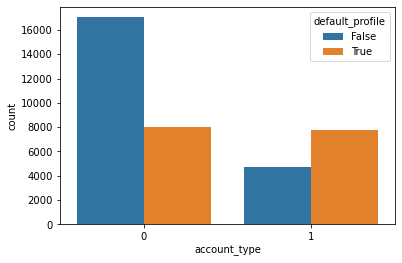

In [22]:
sns.countplot(twitter_df['account_type'], hue = twitter_df['default_profile'])

c:\python3.7.8\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='account_type', ylabel='count'>

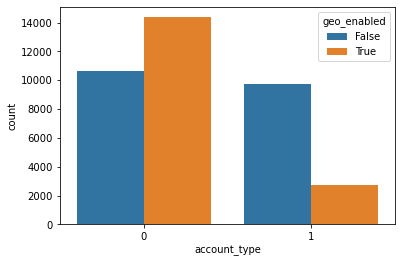

In [23]:
sns.countplot(twitter_df['account_type'], hue = twitter_df['geo_enabled'])

c:\python3.7.8\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='account_type', ylabel='count'>

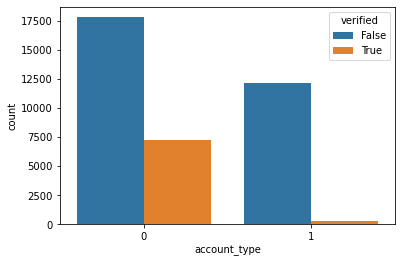

In [24]:
sns.countplot(twitter_df['account_type'], hue = twitter_df['verified'])

In [26]:
twitter_df['screen_name'].nunique()

37438

In [27]:
twitter_df.shape

(37438, 17)

In [28]:
twitter_df.drop('screen_name', axis = 1, inplace = True)

In [29]:
twitter_df.head(2)

,created_at,default_profile,description,favourites_count,followers_count,friends_count,geo_enabled,lang,location,profile_background_image_url,profile_image_url,statuses_count,verified,average_tweets_per_day,account_age_days,account_type
0,2016-10-15 21:32:11,False,"Blame @xaiax, Inspired by @MakingInvisible, us...",4,1589,4,False,en,unknown,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/7874121826...,11041,False,7.870,1403,1
1,2016-11-09 05:01:30,False,Photographing the American West since 1980. I ...,536,860,880,False,en,Estados Unidos,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/8023296328...,252,False,0.183,1379,0


# Let's check description column in detail

In [30]:
bot_filt = (twitter_df['account_type'] == 1)
human_filt = (twitter_df['account_type'] == 0)

In [32]:
bot_bow = twitter_df.loc[bot_filt]['description'].str.strip().values
human_bow = twitter_df.loc[human_filt]['description'].str.strip().values

In [35]:
len(set(bot_bow))

7996

In [36]:
len(set(human_bow))

21985

In [37]:
set(bot_bow).intersection(set(human_bow))

{'#BlackLivesMatter',
 '.',
 '...',
 '17',
 ':)',
 '?',
 'Artist.',
 'Blessed',
 'Civil Engineer',
 'Gamer',
 'Hi',
 'Hi.',
 'Network Engineer',
 'Project Manager',
 'Rocket Ship Builder',
 'Sup.',
 'bye',
 'good vibes only',
 'happy',
 'hi',
 'idc',
 'l',
 'meow',
 'n',
 nan,
 'you already know.',
 '¯\\_(ツ)_/¯',
 '☕️',
 '☺',
 '♏',
 '♡',
 '🇲🇽',
 '👑',
 '💜💜',
 '🦋'}

In [38]:
len(set(bot_bow).intersection(set(human_bow)))

35

# Description would be a useful feature in model training

In [39]:
twitter_df['default_profile'] = twitter_df['default_profile'].map({True:1, False: 0})
twitter_df['geo_enabled'] = twitter_df['geo_enabled'].map({True:1, False: 0})
twitter_df['verified'] = twitter_df['geo_enabled'].map({True:1, False: 0})

In [40]:
twitter_df.head(2)

,created_at,default_profile,description,favourites_count,followers_count,friends_count,geo_enabled,lang,location,profile_background_image_url,profile_image_url,statuses_count,verified,average_tweets_per_day,account_age_days,account_type
0,2016-10-15 21:32:11,0,"Blame @xaiax, Inspired by @MakingInvisible, us...",4,1589,4,0,en,unknown,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/7874121826...,11041,0,7.870,1403,1
1,2016-11-09 05:01:30,0,Photographing the American West since 1980. I ...,536,860,880,0,en,Estados Unidos,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/8023296328...,252,0,0.183,1379,0


In [41]:
twitter_df.drop(['profile_background_image_url', 'profile_image_url'], axis = 1, inplace = True)

In [42]:
twitter_df.head(2)

,created_at,default_profile,description,favourites_count,followers_count,friends_count,geo_enabled,lang,location,statuses_count,verified,average_tweets_per_day,account_age_days,account_type
0,2016-10-15 21:32:11,0,"Blame @xaiax, Inspired by @MakingInvisible, us...",4,1589,4,0,en,unknown,11041,0,7.870,1403,1
1,2016-11-09 05:01:30,0,Photographing the American West since 1980. I ...,536,860,880,0,en,Estados Unidos,252,0,0.183,1379,0


In [43]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37438 entries, 0 to 37437
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   created_at              37438 non-null  object 
 1   default_profile         37438 non-null  int64  
 2   description             30182 non-null  object 
 3   favourites_count        37438 non-null  int64  
 4   followers_count         37438 non-null  int64  
 5   friends_count           37438 non-null  int64  
 6   geo_enabled             37438 non-null  int64  
 7   lang                    29481 non-null  object 
 8   location                37435 non-null  object 
 9   statuses_count          37438 non-null  int64  
 10  verified                37438 non-null  int64  
 11  average_tweets_per_day  37438 non-null  float64
 12  account_age_days        37438 non-null  int64  
 13  account_type            37438 non-null  int64  
dtypes: float64(1), int64(9), object(4)
mem

In [44]:
twitter_df['created_at'] = pd.to_datetime(twitter_df['created_at'])

In [45]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37438 entries, 0 to 37437
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   created_at              37438 non-null  datetime64[ns]
 1   default_profile         37438 non-null  int64         
 2   description             30182 non-null  object        
 3   favourites_count        37438 non-null  int64         
 4   followers_count         37438 non-null  int64         
 5   friends_count           37438 non-null  int64         
 6   geo_enabled             37438 non-null  int64         
 7   lang                    29481 non-null  object        
 8   location                37435 non-null  object        
 9   statuses_count          37438 non-null  int64         
 10  verified                37438 non-null  int64         
 11  average_tweets_per_day  37438 non-null  float64       
 12  account_age_days        37438 non-null  int64 

In [46]:
twitter_df['created_at'] = twitter_df['created_at'].dt.strftime('%H').astype(int)

In [47]:
twitter_df.head(2)

,created_at,default_profile,description,favourites_count,followers_count,friends_count,geo_enabled,lang,location,statuses_count,verified,average_tweets_per_day,account_age_days,account_type
0,21,0,"Blame @xaiax, Inspired by @MakingInvisible, us...",4,1589,4,0,en,unknown,11041,0,7.870,1403,1
1,5,0,Photographing the American West since 1980. I ...,536,860,880,0,en,Estados Unidos,252,0,0.183,1379,0


## Dividing a day into 6 different time categories: Late night, early morning, morning, noon, evening and night

In [48]:
twitter_df['period'] = (twitter_df['created_at'] % 24 + 4) // 4

In [49]:
twitter_df.head(3)

,created_at,default_profile,description,favourites_count,followers_count,friends_count,geo_enabled,lang,location,statuses_count,verified,average_tweets_per_day,account_age_days,account_type,period
0,21,0,"Blame @xaiax, Inspired by @MakingInvisible, us...",4,1589,4,0,en,unknown,11041,0,7.870,1403,1,6
1,5,0,Photographing the American West since 1980. I ...,536,860,880,0,en,Estados Unidos,252,0,0.183,1379,0,2
2,5,0,Scruffy looking nerf herder and @twitch broadc...,3307,172,594,1,en,"Los Angeles, CA",1001,1,0.864,1159,0,2


In [50]:
twitter_df['period'].nunique()

6

In [51]:
twitter_df['period'].value_counts()

5    8016
6    7869
1    6929
4    5994
2    4866
3    3764
Name: period, dtype: int64

In [52]:
twitter_df['period'].replace({1: 'Late Night',
                              2: 'Early Morning',
                              3: 'Morning',
                              4: 'Noon',
                              5: 'Evening',
                              6: 'Night'
                             }, inplace = True)

In [53]:
twitter_df.head(3)

,created_at,default_profile,description,favourites_count,followers_count,friends_count,geo_enabled,lang,location,statuses_count,verified,average_tweets_per_day,account_age_days,account_type,period
0,21,0,"Blame @xaiax, Inspired by @MakingInvisible, us...",4,1589,4,0,en,unknown,11041,0,7.870,1403,1,Night
1,5,0,Photographing the American West since 1980. I ...,536,860,880,0,en,Estados Unidos,252,0,0.183,1379,0,Early Morning
2,5,0,Scruffy looking nerf herder and @twitch broadc...,3307,172,594,1,en,"Los Angeles, CA",1001,1,0.864,1159,0,Early Morning


c:\python3.7.8\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='account_type', ylabel='count'>

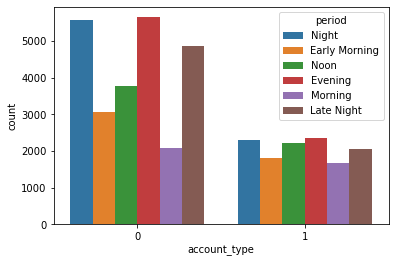

In [54]:
sns.countplot(twitter_df['account_type'], hue = twitter_df['period'])

In [55]:
twitter_df.groupby('period')['account_type'].value_counts()

period         account_type
Early Morning  0               3065
               1               1801
Evening        0               5653
               1               2363
Late Night     0               4870
               1               2059
Morning        0               2085
               1               1679
Night          0               5570
               1               2299
Noon           0               3770
               1               2224
Name: account_type, dtype: int64

In [56]:
twitter_df.drop(['period', 'created_at'], axis = 1, inplace = True)

In [57]:
twitter_df.head(2)

,default_profile,description,favourites_count,followers_count,friends_count,geo_enabled,lang,location,statuses_count,verified,average_tweets_per_day,account_age_days,account_type
0,0,"Blame @xaiax, Inspired by @MakingInvisible, us...",4,1589,4,0,en,unknown,11041,0,7.870,1403,1
1,0,Photographing the American West since 1980. I ...,536,860,880,0,en,Estados Unidos,252,0,0.183,1379,0


In [58]:
grouped_twitter_df = twitter_df.groupby('account_type')

In [59]:
grouped_twitter_df.get_group(0).describe()

,default_profile,favourites_count,followers_count,friends_count,geo_enabled,statuses_count,verified,average_tweets_per_day,account_age_days,account_type
count,25013.000000,25013.000000,2.501300e+04,2.501300e+04,25013.000000,2.501300e+04,25013.000000,25013.000000,25013.000000,25013.0
mean,0.318994,16186.048455,5.177475e+05,4.207621e+03,0.574141,2.146526e+04,0.574141,6.712556,3173.561308,0.0
std,0.466096,37322.654404,2.916633e+06,4.764074e+04,0.494482,4.694461e+04,0.494482,14.585320,995.928741,0.0
min,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,606.000000,0.0
25%,0.000000,649.000000,1.840000e+02,1.720000e+02,0.000000,2.093000e+03,0.000000,0.715000,2542.000000,0.0
50%,0.000000,3649.000000,1.046000e+03,4.740000e+02,1.000000,7.551000e+03,1.000000,2.410000,3395.000000,0.0
75%,1.000000,14955.000000,7.224600e+04,1.153000e+03,1.000000,2.238000e+04,1.000000,6.933000,4032.000000,0.0
max,1.000000,885123.000000,1.216415e+08,4.343060e+06,1.000000,2.129049e+06,1.000000,557.927000,5158.000000,0.0


In [60]:
grouped_twitter_df.get_group(1).describe()

,default_profile,favourites_count,followers_count,friends_count,geo_enabled,statuses_count,verified,average_tweets_per_day,account_age_days,account_type
count,12425.000000,12425.000000,1.242500e+04,1.242500e+04,12425.000000,1.242500e+04,12425.000000,12425.000000,12425.000000,12425.0
mean,0.623018,4483.136740,7.350027e+04,4.925660e+03,0.218592,2.028449e+04,0.218592,7.252241,2717.274930,1.0
std,0.484650,23913.709073,1.066970e+06,5.317140e+04,0.413307,9.603377e+04,0.413307,37.310915,980.016502,0.0
min,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,483.000000,1.0
25%,0.000000,140.000000,8.000000e+00,0.000000e+00,0.000000,4.050000e+02,0.000000,0.222000,1900.000000,1.0
50%,1.000000,1131.000000,2.500000e+01,3.100000e+01,0.000000,2.178000e+03,0.000000,0.817000,2882.000000,1.0
75%,1.000000,2231.000000,1.930000e+02,2.470000e+02,0.000000,4.481000e+03,0.000000,1.949000,3467.000000,1.0
max,1.000000,839929.000000,4.955794e+07,2.169597e+06,1.000000,2.771910e+06,1.000000,1269.055000,5011.000000,1.0


In [61]:
twitter_df.drop('description', axis = 1, inplace = True)

In [62]:
twitter_df['lang'].nunique()

48

In [63]:
twitter_df['lang'].value_counts()

en       21450
es        1213
pt         704
it         637
ar         594
de         536
ja         378
fr         375
af         333
id         313
ru         250
tr         220
ca         198
tl         192
sw         182
da         174
no         172
nl         165
ro         148
cy         143
sv         126
so         125
ko         115
et          95
zh-cn       91
fi          72
pl          62
vi          55
hr          50
sl          43
hu          35
th          31
sk          31
lt          28
sq          23
bg          20
el          18
mk          16
uk          13
fa          12
cs          12
ur           9
hi           8
lv           6
zh-tw        3
he           2
ne           2
pa           1
Name: lang, dtype: int64

In [64]:
twitter_df['location'].nunique()

12050

In [65]:
twitter_df.drop(['lang', 'location'], axis = 1, inplace = True)

In [66]:
twitter_df.head(3)

,default_profile,favourites_count,followers_count,friends_count,geo_enabled,statuses_count,verified,average_tweets_per_day,account_age_days,account_type
0,0,4,1589,4,0,11041,0,7.870,1403,1
1,0,536,860,880,0,252,0,0.183,1379,0
2,0,3307,172,594,1,1001,1,0.864,1159,0


In [67]:
twitter_df.isnull().sum()

default_profile           0
favourites_count          0
followers_count           0
friends_count             0
geo_enabled               0
statuses_count            0
verified                  0
average_tweets_per_day    0
account_age_days          0
account_type              0
dtype: int64

## Let's shuffle the data

In [ ]:
twitter_df = twitter_df.sample(frac=1.0, random_state=42)

In [69]:
twitter_df.head(3)

,default_profile,favourites_count,followers_count,friends_count,geo_enabled,statuses_count,verified,average_tweets_per_day,account_age_days,account_type
36730,0,48,42,0,0,3458,0,1.006,3437,1
25960,1,609,264,345,0,4488,0,2.200,2040,1
12307,0,11283,1625,709,0,5527,0,3.685,1500,0


In [70]:
twitter_df.reset_index(inplace = True)

In [71]:
twitter_df.head(3)

,index,default_profile,favourites_count,followers_count,friends_count,geo_enabled,statuses_count,verified,average_tweets_per_day,account_age_days,account_type
0,36730,0,48,42,0,0,3458,0,1.006,3437,1
1,25960,1,609,264,345,0,4488,0,2.200,2040,1
2,12307,0,11283,1625,709,0,5527,0,3.685,1500,0


In [72]:
twitter_df.drop('index', axis = 1, inplace = True)

In [73]:
twitter_df.head(3)

,default_profile,favourites_count,followers_count,friends_count,geo_enabled,statuses_count,verified,average_tweets_per_day,account_age_days,account_type
0,0,48,42,0,0,3458,0,1.006,3437,1
1,1,609,264,345,0,4488,0,2.200,2040,1
2,0,11283,1625,709,0,5527,0,3.685,1500,0


# Let's start building machine learning models

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
def split_data(twitter_df):
    X_train, X_test, y_train, y_test = train_test_split(twitter_df.drop('account_type', axis = 1), twitter_df['account_type'], 
                                                        test_size=0.33, random_state=42, stratify = twitter_df['account_type'])
    return X_train, X_test, y_train, y_test

In [76]:
X_train, X_test, y_train, y_test = split_data(twitter_df)

In [77]:
X_train.head()

,default_profile,favourites_count,followers_count,friends_count,geo_enabled,statuses_count,verified,average_tweets_per_day,account_age_days
10386,0,2790,659079,838,0,3165,0,0.762,4155
4620,1,233,275,391,0,3206,0,1.544,2076
11127,0,15120,514,0,0,14750,0,4.876,3025
35073,1,2470,7486,2461,1,200828,1,47.680,4212
5042,1,30,9,0,0,283,0,0.096,2936


In [78]:
X_test.head()

,default_profile,favourites_count,followers_count,friends_count,geo_enabled,statuses_count,verified,average_tweets_per_day,account_age_days
13121,1,531,26,0,0,96,0,0.070,1379
27688,0,1759,2979,788,1,3998,1,1.384,2888
10523,1,14,0,0,0,105,0,0.091,1155
33894,1,1965,91,94,0,3717,0,1.001,3713
14680,0,27627,195,202,0,10825,0,3.067,3530


In [79]:
y_train

10386    0
4620     1
11127    1
35073    0
5042     0
        ..
15275    0
1701     0
25269    0
24271    1
26324    1
Name: account_type, Length: 25083, dtype: int64

In [80]:
y_test

13121    1
27688    0
10523    1
33894    1
14680    0
        ..
30258    0
1961     0
4618     0
27560    1
4201     0
Name: account_type, Length: 12355, dtype: int64

# Let's try logistic regression, decision tree, random forest and SVM

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [82]:
# Logistic regression model
LRC = LogisticRegression()

# Support vector model
SVM = SVC()

# Decision tree model
DTC = DecisionTreeClassifier()

# Random Forest model
RFC = RandomForestClassifier()

In [83]:
LRC.fit(X_train, y_train)

LogisticRegression()

In [84]:
LRC.score(X_train, y_train)

0.6736833712075908

In [85]:
LRC.score(X_test, y_test)

0.6715499797652772

In [86]:
SVM.fit(X_train, y_train)

SVC()

In [87]:
SVM.score(X_train, y_train)

0.6685005780807718

In [88]:
SVM.score(X_test, y_test)

0.6683933630109268

In [89]:
DTC.fit(X_train, y_train)

DecisionTreeClassifier()

In [90]:
DTC.score(X_train, y_train)

1.0

In [91]:
DTC.score(X_test, y_test)

0.8316471064346418

In [92]:
RFC.fit(X_train, y_train)

RandomForestClassifier()

In [93]:
RFC.score(X_train, y_train)

0.9999601323605629

In [94]:
RFC.score(X_test, y_test)

0.8821529745042493

In [95]:
X_train.head()

,default_profile,favourites_count,followers_count,friends_count,geo_enabled,statuses_count,verified,average_tweets_per_day,account_age_days
10386,0,2790,659079,838,0,3165,0,0.762,4155
4620,1,233,275,391,0,3206,0,1.544,2076
11127,0,15120,514,0,0,14750,0,4.876,3025
35073,1,2470,7486,2461,1,200828,1,47.680,4212
5042,1,30,9,0,0,283,0,0.096,2936


# Lets scale the feature values

In [98]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [99]:
def scale_features(train_df,test_df,scale_type):
    to_be_scaled = ['favourites_count', 'followers_count', 'friends_count', 'statuses_count', 'average_tweets_per_day', 'account_age_days']
    if scale_type == "minmax":
        scaler = MinMaxScaler()
    else:
        scaler = StandardScaler()
    
    train_df[to_be_scaled] = scaler.fit_transform(train_df[to_be_scaled])
    
    # We also need to apply the same scaler strategy on test dataset, instead of fit_transform, we just have to use transform
    test_df[to_be_scaled] = scaler.transform(test_df[to_be_scaled])
    
    return train_df, test_df

In [100]:
train_df, test_df = scale_features(X_train, X_test, 'minmax')

In [101]:
train_df.head()

,default_profile,favourites_count,followers_count,friends_count,geo_enabled,statuses_count,verified,average_tweets_per_day,account_age_days
10386,0,0.003631,5.418210e-03,0.000193,0,0.001142,0,0.000640,0.785225
4620,1,0.000303,2.260742e-06,0.000090,0,0.001157,0,0.001296,0.340043
11127,0,0.019678,4.225533e-06,0.000000,0,0.005321,0,0.004093,0.543255
35073,1,0.003215,6.154151e-05,0.000567,1,0.072451,1,0.040024,0.797430
5042,1,0.000039,7.398792e-08,0.000000,0,0.000102,0,0.000081,0.524197


In [102]:
test_df.head()

,default_profile,favourites_count,followers_count,friends_count,geo_enabled,statuses_count,verified,average_tweets_per_day,account_age_days
13121,1,0.000691,2.137429e-07,0.000000,0,0.000035,0,0.000059,0.190792
27688,0,0.002289,2.449000e-05,0.000181,1,0.001442,1,0.001162,0.513919
10523,1,0.000018,0.000000e+00,0.000000,0,0.000038,0,0.000076,0.142827
33894,1,0.002557,7.481001e-07,0.000022,0,0.001341,0,0.000840,0.690578
14680,0,0.035955,1.603072e-06,0.000047,0,0.003905,0,0.002575,0.651392


In [103]:
# Logistic regression model
LRC = LogisticRegression()

# Support vector model
SVM = SVC()

# Decision tree model
DTC = DecisionTreeClassifier()

# Random Forest model
RFC = RandomForestClassifier()

In [104]:
LRC.fit(train_df, y_train)

LogisticRegression()

In [105]:
LRC.score(train_df, y_train)

0.7397839173942511

In [106]:
LRC.score(test_df, y_test)

0.7485228652367463

In [107]:
SVM.fit(train_df, y_train)

SVC()

In [108]:
SVM.score(train_df, y_train)

0.7344815213491209

In [109]:
SVM.score(test_df, y_test)

0.7431808984216917

In [110]:
DTC.fit(train_df, y_train)

DecisionTreeClassifier()

In [111]:
DTC.score(train_df, y_train)

1.0

In [112]:
DTC.score(test_df, y_test)

0.8251719951436666

In [113]:
RFC.fit(train_df, y_train)

RandomForestClassifier()

In [114]:
RFC.score(train_df, y_train)

0.9999601323605629

In [115]:
RFC.score(test_df, y_test)

0.8792391744233105

## Logistic regression and SVM saw an improvement of around 6-7% in its performance after scaling the features, but scaling the features has no impace on DTC and RFC

# Running k-fold cross validation

In [116]:
from sklearn import model_selection

In [121]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [122]:
def kfold_validations(X_train, y_train):
    
    kf = model_selection.KFold(n_splits = 3, shuffle=True, random_state = 42)
    
    # KFold for Logistic Regression
    print("\nRunning kfold validations using Simple Logistic Regression model:\n")
    LRResults = []
    LRModels = []
    for train_indices, val_indices in kf.split(X_train , y_train):
        LRC = LogisticRegression(n_jobs = -1)
        LRC.fit(X_train.iloc[train_indices], y_train.iloc[train_indices])
        LRResults.append(LRC.score(X_train.iloc[val_indices], y_train.iloc[val_indices]))
        LRModels.append(LRC)
        print("    ",LRResults[-1])

    print("\nMean Accuracy for Logistic Regression model is: ", np.mean(LRResults))
    
    
    # Kfold for KNN classification
    print("\nRunning kfold validations using KNN Classification model:\n")
    KNNResults = []
    KNNModels = []
    for train_indices, val_indices in kf.split(X_train , y_train):
        KNNC = KNeighborsClassifier(n_jobs = -1)
        KNNC.fit(X_train.iloc[train_indices], y_train.iloc[train_indices])
        KNNResults.append(KNNC.score(X_train.iloc[val_indices], y_train.iloc[val_indices]))
        KNNModels.append(KNNC)
        print("    ",KNNResults[-1])

    print("\nMean Accuracy Score for KNN Classification model is: ", np.mean(KNNResults))
    
    
    # Kfold for Support Vector classication
    print("\nRunning kfold validations using support vector Classification model:\n")
    SVMResults = []
    SVMModels = []
    for train_indices, val_indices in kf.split(X_train , y_train):
        SVM = SVC(kernel = 'linear')
        SVM.fit(X_train.iloc[train_indices], y_train.iloc[train_indices])
        SVMResults.append(SVM.score(X_train.iloc[val_indices], y_train.iloc[val_indices]))
        SVMModels.append(SVM)
        print("    ",SVMResults[-1])

    print("\nMean Accuracy for Support Vector Classification model is: ", np.mean(SVMResults))
    
    
    # Kfold for Random Forest classification
    print("\nRunning kfold valiations using Random Forest Classification:\n")
    RFResults = []
    RFModels = []
    for train_indices, val_indices in kf.split(X_train , y_train):
        RFM = RandomForestClassifier(random_state = 42, n_jobs = -1)
        RFM.fit(X_train.iloc[train_indices], y_train.iloc[train_indices])
        RFResults.append(RFM.score(X_train.iloc[val_indices], y_train.iloc[val_indices]))
        RFModels.append(RFM)
        print("    ",RFResults[-1])

    print("\nMean Accuracy for Random Forest Classification model is: ", np.mean(RFResults))
    
    
    # Kfold for Gradient Boost classification
    print("\nRunning kfold validations using Gradient Boost Classification:\n")
    GBResults = []
    GBModels = []
    for train_indices, val_indices in kf.split(X_train , y_train):
        GBR = GradientBoostingClassifier(random_state = 42)
        GBR.fit(X_train.iloc[train_indices], y_train.iloc[train_indices])
        GBResults.append(GBR.score(X_train.iloc[val_indices], y_train.iloc[val_indices]))
        GBModels.append(GBR)

        print("    ",GBResults[-1])

    print("\nMean R2 Score for Gradient Boost Classification model is: ", np.mean(GBResults))
    
    BestLRM = LRModels[np.argmax(LRResults)]
    BestKNN = KNNModels[np.argmax(GBResults)]
    BestSVM = SVMModels[np.argmax(SVMResults)]
    BestRFM = RFModels[np.argmax(RFResults)]
    BestGBM = GBModels[np.argmax(GBResults)]
   
    
    return BestLRM, BestKNN, BestSVM, BestRFM, BestGBM

In [123]:
BestLRM, BestKNN, BestSVM, BestRFM, BestGBM = kfold_validations(X_train, y_train)


Running kfold validations using Simple Logistic Regression model:

     0.735079535940677
     0.7423753139576605
     0.7371127855519675

Mean Accuracy for Logistic Regression model is:  0.7381892118167683

Running kfold validations using KNN Classification model:

     0.7767013515129769
     0.7833991149384045
     0.78890084918072

Mean Accuracy Score for KNN Classification model is:  0.7830004385440338

Running kfold validations using support vector Classification model:

     0.7312522425547183
     0.7351991388589881
     0.729338595861739

Mean Accuracy for Support Vector Classification model is:  0.7319299924251484

Running kfold valiations using Random Forest Classification:

     0.8705896423872742
     0.8683171869393613
     0.8790814495873699

Mean Accuracy for Random Forest Classification model is:  0.8726627596380018

Running kfold validations using Gradient Boost Classification:

     0.8469082645616554
     0.8491807200095682
     0.8562372921899294

Mean R2 Score fo

## I will select the best performing model out of above 5, that is Random Forest classifier with accuracy of 87.90%

In [125]:
from sklearn.model_selection import GridSearchCV

In [126]:
def param_tuning_RFM(BestRFM, X_train, y_train):
    
    RF_parameters = {"n_estimators"      : [100,200],
                     "max_features"      : ["auto", "sqrt"],
                     "max_depth"         : [4,6],
                     "min_samples_split" : [2,3],
                     "warm_start"        : [True, False],
                     "random_state"      : [43,50,42],
                     }
    RF_grid = GridSearchCV(BestRFM, RF_parameters, n_jobs=-1, cv=5, verbose = 2, return_train_score=True)
    RF_grid.fit(X_train, y_train)
    return RF_grid

In [127]:
RF_grid = param_tuning_RFM(BestRFM, X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


In [128]:
RF_grid.best_params_

{'max_depth': 6,
 'max_features': 'auto',
 'min_samples_split': 2,
 'n_estimators': 100,
 'random_state': 50,
 'warm_start': True}

In [129]:
RF_grid.best_score_

0.8441179336348918

In [130]:
Tuned_RFC = RandomForestClassifier(max_depth=6,
                                  max_features='auto',
                                  min_samples_split=2,
                                  n_estimators = 100,
                                  random_state= 50,
                                  warm_start = True)

In [131]:
Tuned_RFC.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, random_state=50, warm_start=True)

In [132]:
Tuned_RFC.score(X_train, y_train)

0.8492205876490053

In [133]:
Tuned_RFC.score(X_test, y_test)

0.8462970457304735

In [134]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [135]:
test_predictions = Tuned_RFC.predict(X_test)

In [136]:
train_predictions = Tuned_RFC.predict(X_train)

In [137]:
print(confusion_matrix(y_train, train_predictions))

[[15296  1462]
 [ 2320  6005]]


In [138]:
print(confusion_matrix(y_test, test_predictions))

[[7515  740]
 [1159 2941]]


In [139]:
print(classification_report(y_train, train_predictions))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89     16758
           1       0.80      0.72      0.76      8325

    accuracy                           0.85     25083
   macro avg       0.84      0.82      0.83     25083
weighted avg       0.85      0.85      0.85     25083



In [140]:
import pickle

In [141]:
pickle.dump(Tuned_RFC, open('Tuned_RFC_model', 'wb'))